In [1]:
library(igraph)
library(data.table)
library(rjson)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
edge_file = "san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv"
json_file = "san_francisco_censustracts.json"

In [3]:
edge_list = read.csv(file = edge_file, header = TRUE, sep = ",")

In [4]:
edge_table = as.data.table(edge_list)

In [5]:
edge_data = edge_table[month == 12][, c("sourceid", "dstid", "mean_travel_time")]

In [6]:
json_data = fromJSON(file = json_file)

In [7]:
features = json_data $ features
len = length(features)

In [8]:
id_list = c()
x_list = c()
y_list = c()
dist_list = c()
loc_list = list()

for(i in 1:len){
    feature = features[[i]]
    dist_list = c(dist_list, feature$properties$DISPLAY_NAME)
    location = feature$geometry$coordinates
    location_list = split(unlist(location), 1:2)
    avg_x = mean(location_list[[1]])
    avg_y = mean(location_list[[2]])
    x_list = c(x_list, avg_x)
    y_list = c(y_list, avg_y)
    loc = c()
    loc = c(loc, avg_x)
    loc = c(loc, avg_y)
    loc_list[[i]] = loc
    id_list = c(id_list, feature$properties$MOVEMENT_ID)
}


In [9]:
g = graph.data.frame(d = edge_data, directed = FALSE)

In [10]:
g

IGRAPH 4af8244 UN-- 1887 538998 -- 
+ attr: name (v/c), mean_travel_time (e/n)
+ edges from 4af8244 (vertex names):
 [1] 1938--1952 1747--629  1872--1919 1871--1929 81  --2319 1873--1909
 [7] 232 --809  1891--1729 2423--62   650 --1829 680 --1529 542 --2251
[13] 604 --1631 660 --1729 1329--1917 2421--82   1736--739  2021--1192
[19] 550 --2171 1721--1308 1700--1518 176 --2145 1721--889  536 --2311
[25] 74  --2466 288 --326  169 --2215 99  --2216 1755--549  646 --1211
[31] 2315--528  2322--458  2307--608  1390--111  641 --1261 1872--1946
[37] 2357--108  1454--64   1729--809  2355--128  722 --1207 2307--612 
[43] 98  --2226 1074--464  1058--624  614 --1531 151 --2395 2341--268 
+ ... omitted several edges

In [11]:
id2dist = as.list(setNames(dist_list, id_list))

In [12]:
V(g)$DISPLAY = id2dist[V(g)$name]

In [13]:
id2x = as.list(setNames(x_list, id_list))
id2y = as.list(setNames(y_list, id_list))

In [14]:
V(g)$loc_x = id2x[V(g)$name]
V(g)$loc_y = id2y[V(g)$name]

In [15]:
id2loc = as.list(setNames(loc_list, id_list))

In [16]:
V(g)$loc = id2loc[V(g)$name]

In [17]:
g = simplify(g, remove.multiple = TRUE, edge.attr.comb = "mean" )

In [19]:
clusters = components(g)


In [20]:
gcc = induced.subgraph(g, which(clusters$membership == which.max(clusters$csize)))

In [28]:
G = gcc

In [29]:
#P6
vcount(G)

[1] 1880

In [30]:
ecount(G)

[1] 311802

In [32]:
#p7
mst = mst(G, weights = E(G)$mean_travel_time)

In [66]:
xxxx = edge_data[sourceid == 81][dstid ==9271][, c("mean_travel_time")][[1]]

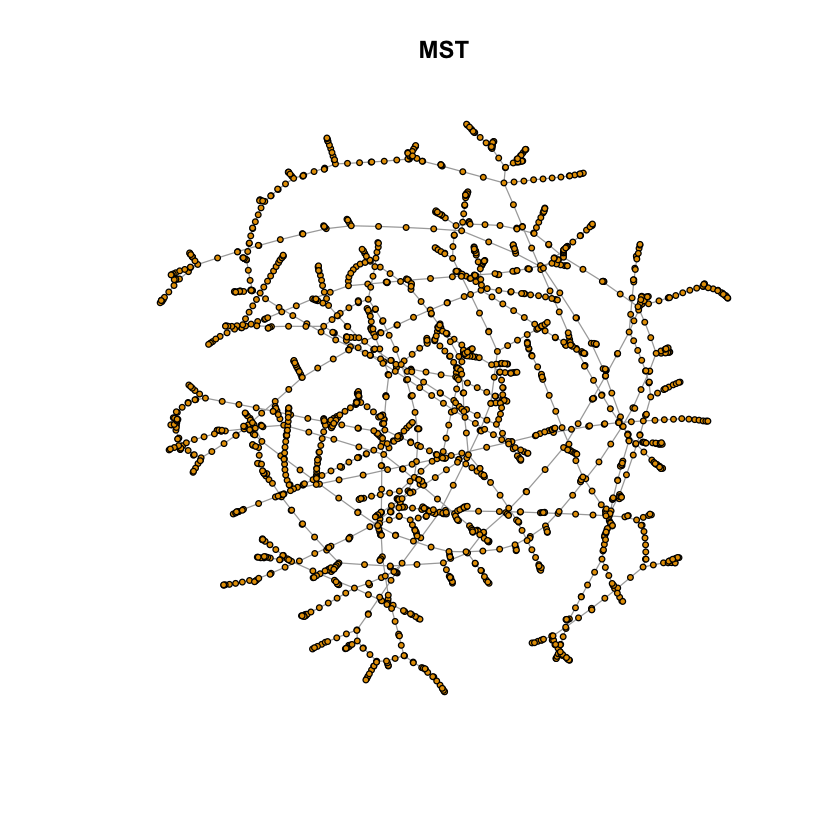

In [33]:
plot(mst, vertex.color = rep(1, vcount(G)), vertex.size = rep(2, vcount(G)), vertex.label = NA, main="MST")

In [76]:
#P8 check Triangle Inequality
check_ineql <- function(G){ 
count = 0
iter = 0
print("start")
for(v1 in V(G)){
    for(v2 in V(G)){
        for(v3 in V(G)){
            if(v1 != v2 && v2 != v3 && v1 != v3){
                a = edge_data[sourceid == v1][dstid == v2][, c("mean_travel_time")][[1]]
                b = edge_data[sourceid == v2][dstid == v3][, c("mean_travel_time")][[1]]
                c = edge_data[sourceid == v1][dstid == v3][, c("mean_travel_time")][[1]]
                if(length(a) > 0 && length(b) > 0 && length(c) > 0){
                    print(a)
                    if(a > b + c) count = count + 1
                    iter = iter + 1
                    if(iter > 5) return(count)
                }    
            }
                
        }
    }
}
}

In [77]:
xxxx = check_ineql(G)